In [2]:
import tensorflow as tf #pip install tensorflow


In [3]:
mnist=tf.keras.datasets.mnist

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


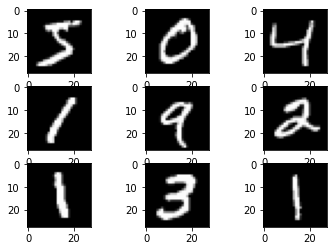

In [4]:
# example of loading the mnist dataset
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [5]:
import matplotlib.pyplot as plt

In [6]:
print(trainX[0]);

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## checking the values of each pixel
## before normalization

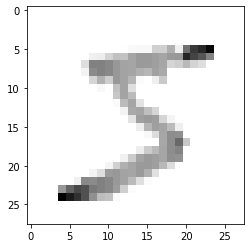

In [7]:
trainX=tf.keras.utils.normalize(trainX,axis=1)
testX=tf.keras.utils.normalize(testX,axis=1)
plt.imshow(trainX[0], cmap=plt.cm.binary)

In [8]:
print(trainX[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(trainy[0])

5


## Resizing image to make it suitable fro appling convolution operation

In [10]:
import numpy as np #pip install numpy
IMG_SIZE=28
x_trainr=trainX.reshape((trainX.shape[0], 28, 28, 1))
x_testr=testX.reshape((testX.shape[0], 28, 28, 1))
print("Training sample dimension",x_trainr.shape)
print("Testing sample dimension",x_testr.shape)

Training sample dimension (60000, 28, 28, 1)
Testing sample dimension (10000, 28, 28, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten, Dropout, Activation

## create a neural network

In [12]:
model = Sequential()

## first convolution layer 0 1 2 3 (60000,28,28,1)
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D((2, 2)))
    ##relu drops values smaller than 0;
    ##max pooling max vale of 2x2
##2nd layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1)))  
model.add(Activation("relu"))
model.add(MaxPooling2D((2, 2)))
    
##3rd
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1)))  
model.add(Activation("relu"))
model.add(MaxPooling2D((2, 2)))

##flatten model 
## 2d to 1d 20x20=400
model.add(Flatten())
##model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(64)) ##dense nn
model.add(Activation("relu"))


##2nd 
model.add(Dense(32)) ##dense nn
model.add(Activation("relu"))

model.add(Dense(10)) ##dense last layer must be equal to 10
model.add(Activation("softmax")) 

    


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [14]:
model.compile( loss='sparse_categorical_crossentropy',optimizer="adam", metrics=['accuracy'])

In [15]:
##training the model
model.fit(x_trainr,trainy,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 20s 15ms/step - loss: 0.3307 - accuracy: 0.8970 - val_loss: 0.1201 - val_accuracy: 0.9622
Epoch 2/5
1313/1313 [==============================] - 20s 15ms/step - loss: 0.1027 - accuracy: 0.9694 - val_loss: 0.0830 - val_accuracy: 0.9743
Epoch 3/5
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0741 - accuracy: 0.9777 - val_loss: 0.0735 - val_accuracy: 0.9776
Epoch 4/5
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0598 - accuracy: 0.9815 - val_loss: 0.0852 - val_accuracy: 0.9758
Epoch 5/5
1313/1313 [==============================] - 19s 15ms/step - loss: 0.0458 - accuracy: 0.9855 - val_loss: 0.0693 - val_accuracy: 0.9800


In [16]:
##evaluqting on mnist
test_loss,test_acc=model.evaluate(x_testr,testy)
print("Testloss on 10000 datasets",test_loss)
print("Validation accuracy",test_acc*100)

313/313 [==============================] - 1s 4ms/step - loss: 0.0723 - accuracy: 0.9793
Testloss on 10000 datasets 0.07228175550699234
Validation accuracy 97.93000221252441


In [17]:
predictions=model.predict([x_testr])

313/313 [==============================] - 1s 3ms/step


In [18]:
print(predictions)

[[2.3626099e-09 1.1626879e-06 6.0771072e-08 ... 9.9999785e-01
  6.0747459e-07 2.0989714e-07]
 [1.3854096e-04 1.6549128e-03 9.9814153e-01 ... 2.2470072e-06
  1.5879874e-06 3.3410359e-08]
 [5.0884360e-08 9.9999475e-01 3.5624126e-07 ... 3.3448697e-07
  7.0069802e-07 1.4234104e-09]
 ...
 [1.2276708e-08 4.9279458e-07 4.0820904e-08 ... 1.6677554e-07
  6.2890746e-07 4.4813007e-07]
 [1.2611591e-07 3.0096652e-09 8.4257192e-11 ... 2.4365485e-09
  2.2784652e-05 1.4919586e-07]
 [6.6489802e-06 2.1523309e-07 2.5665301e-07 ... 2.0264621e-09
  1.9434344e-07 6.7145209e-07]]


In [19]:
print(np.argmax(predictions[0]))

7


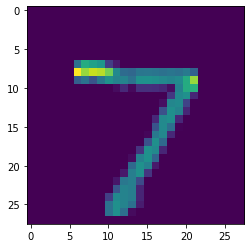

In [20]:
plt.imshow(testX[0])

6


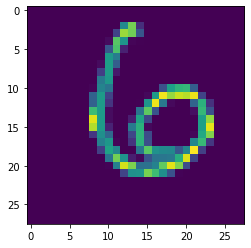

In [21]:
print(np.argmax(predictions[100]))
plt.imshow(testX[100])